In [1]:
import time

import matplotlib.pyplot as plt
import numpy
import scipy
import pandas
import seaborn

%matplotlib inline

# Generate simulations

In [2]:
data_path = "../data/trial_run/summary.csv"
results = pandas.read_csv(data_path)
results.head()

,Unnamed: 0,period,steps_to_reach,n_cells_alive
0,0,1,5,0.0
1,1,1,3,0.0
2,2,1,19,8.0
3,3,2,9,14.0
4,4,1,9,0.0


# Analyse results

First, check that the maximum number of steps we waited (200) was actually enough to reach the attractor

In [3]:
results.steps_to_reach.max()

78

Let's now see what kind of attractors we were getting.

### Period length

In [4]:
results["period"].value_counts(normalize=True)

1     0.8568
2     0.1238
24    0.0097
4     0.0065
12    0.0026
6     0.0006
Name: period, dtype: float64

* Most attractors are fixed points
* Even most cyclic attractors are of periodicity 2, longer cycles are rare

### Number of cells alive

In [10]:
results["prop_cells_alive"] = results["n_cells_alive"]/(6*6)
results["prop_cells_alive"].value_counts(normalize=True)

0.000000    0.6401
0.166667    0.0875
0.388889    0.0649
0.111111    0.0605
0.083333    0.0529
0.194444    0.0310
0.222222    0.0286
0.138889    0.0175
0.319444    0.0074
0.138889    0.0042
0.444444    0.0030
0.319444    0.0009
0.305556    0.0005
0.361111    0.0003
0.291667    0.0003
0.291667    0.0002
0.291667    0.0001
0.333333    0.0001
Name: prop_cells_alive, dtype: float64

* Most attractors are dead (~64%)
* Less than half of the cells are alive in any attractor (for cycles, on average over the cycle)

## Attractor types
This is a somewhat arbitrary classification

dead                       0.6401
non-trivial fixed point    0.2167
cycle                      0.1432
Name: attractor_type, dtype: float64

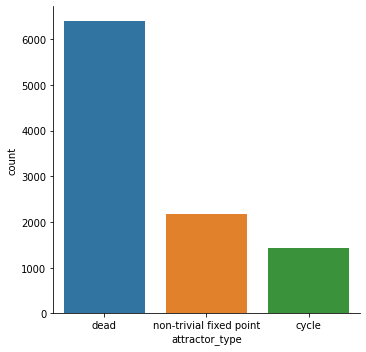

In [11]:
def get_attractor_type(row):
    if row["n_cells_alive"] == 0:
        return "dead"
    if row["period"] == 1:
        return "non-trivial fixed point"
    else:
        return "cycle"
    
results["attractor_type"] = results.apply(get_attractor_type, axis=1)
seaborn.catplot(x="attractor_type", kind="count", data=results)

results["attractor_type"].value_counts(normalize=True)

* Most attractors consist of purely dead cells
* Even most attractors with some cells alive are at a fixed point

### Correlations between period length and number of cells alive

Pearson R:  0.18527931493668431
p-value:  6.242286718718221e-78


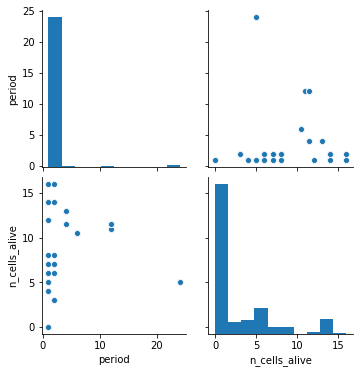

In [12]:
r, p_val = scipy.stats.pearsonr(results["period"], results["n_cells_alive"])
print("Pearson R: ", r)
print("p-value: ", p_val)

seaborn.pairplot(results[["period", "n_cells_alive"]])

* No significancy correlation between the length of the period and the number of cells alive